# Importing Needed libraries

In [149]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

# Importing data

In [125]:
df = pd.read_csv("datasets/Crop_recommendation.csv")

In [126]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,33.474547
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,33.792242
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,38.460579
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,32.714099
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,31.454324


In [127]:
df = df.rename(columns={'soil_moisture':'Soil_Moisture',
                   'label':'Crop',
                   'N': 'Ratio_of_Nitrogen',
                   'P':'Ratio_of_Phosphorous',
                   'K': 'Ratio_of_ Potassium',}
              )
df.head()

,Ratio_of_Nitrogen,Ratio_of_Phosphorous,Ratio_of_ Potassium,temperature,humidity,ph,rainfall,Crop,Soil_Moisture
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,33.474547
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,33.792242
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,38.460579
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,32.714099
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,31.454324


# Exploratory Data Analysis 

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ratio_of_Nitrogen     2200 non-null   int64  
 1   Ratio_of_Phosphorous  2200 non-null   int64  
 2   Ratio_of_ Potassium   2200 non-null   int64  
 3   temperature           2200 non-null   float64
 4   humidity              2200 non-null   float64
 5   ph                    2200 non-null   float64
 6   rainfall              2200 non-null   float64
 7   Crop                  2200 non-null   object 
 8   Soil_Moisture         2200 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 154.8+ KB


In [129]:
df.isnull().sum()

Ratio_of_Nitrogen       0
Ratio_of_Phosphorous    0
Ratio_of_ Potassium     0
temperature             0
humidity                0
ph                      0
rainfall                0
Crop                    0
Soil_Moisture           0
dtype: int64

In [130]:
df.duplicated().sum()

0

In [131]:
df.describe()

,Ratio_of_Nitrogen,Ratio_of_Phosphorous,Ratio_of_ Potassium,temperature,humidity,ph,rainfall,Soil_Moisture
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,37.648580
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,4.291992
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,30.002819
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,34.074320
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,37.678688
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,41.393263
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,44.999825


In [132]:
df['Crop'].unique().size

22

In [133]:
df['Crop'].value_counts()

Crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [134]:
df["Crop"] = df["Crop"].astype("category")

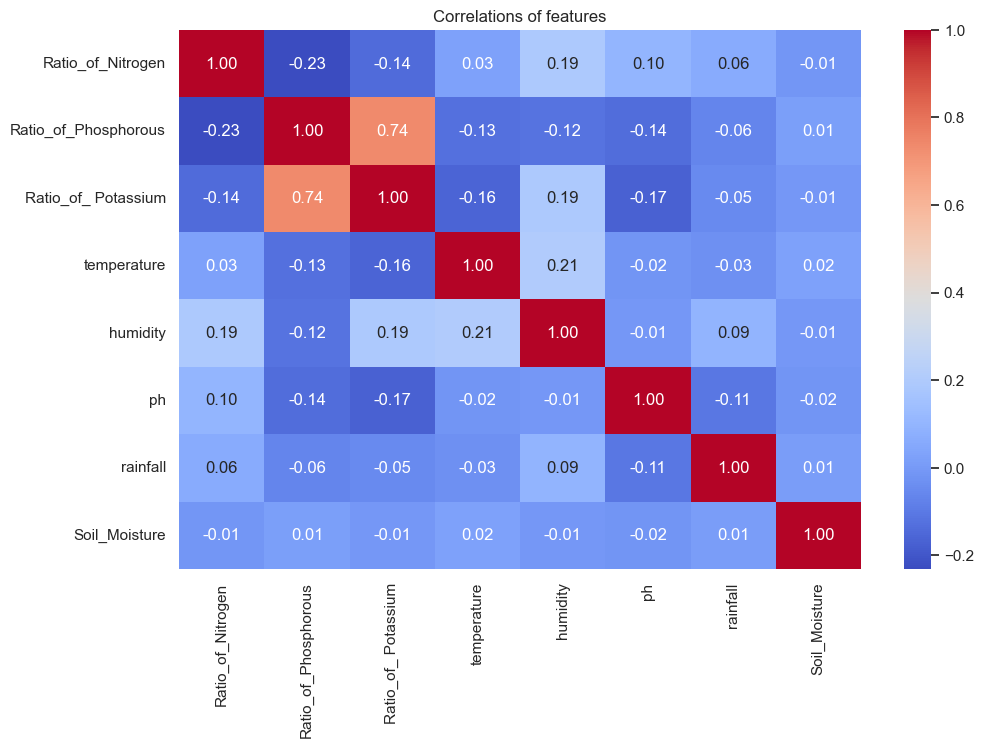

In [135]:
df_numeric = df.select_dtypes(include=np.number)
corr_matrix = df_numeric.corr()
plt.figure(figsize=(11,7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlations of features")
plt.show()

- the Ratio_of_Phosphorous and Ratio_of_Potassium have a strong positive correlation 
- Soil moisture has almost no correlation with the other features

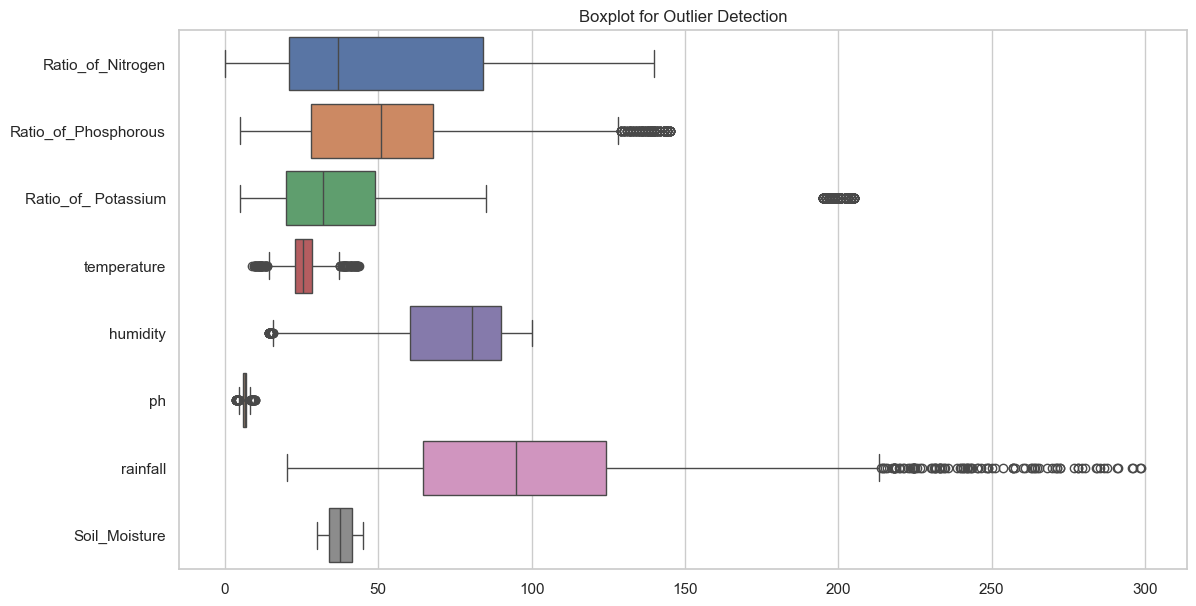

In [136]:
plt.figure(figsize=(13,7))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot for Outlier Detection")
plt.show()

- columns like Ratio_of_Phosphorous and rainfall have outliers

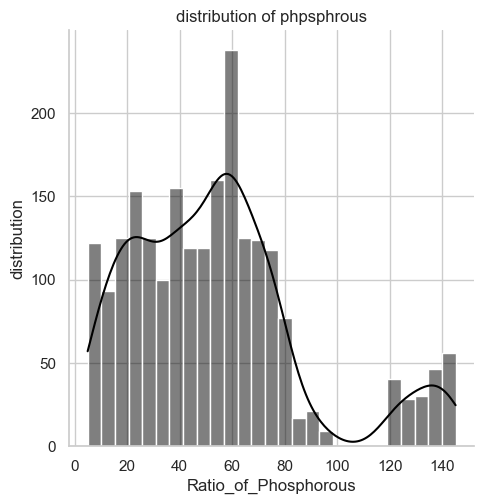

In [137]:
sns.displot(df, x="Ratio_of_Phosphorous", kde=True, bins=27, color="black")
plt.xlabel("Ratio_of_Phosphorous")
plt.ylabel("distribution")
plt.title("distribution of phpsphrous")
plt.show()

## The relation between every type of  crop and rainfall

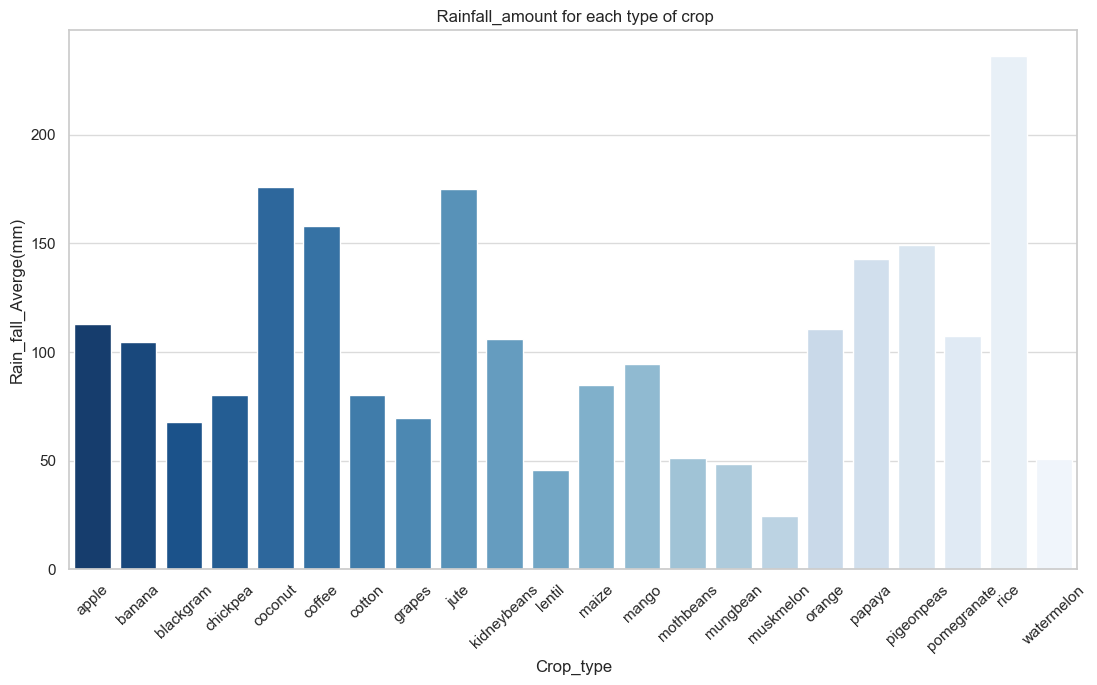

In [138]:

rainfall_by_crop = df.groupby("Crop")["rainfall"].mean().sort_values()

plt.figure(figsize=(13, 7))
sns.barplot(x=rainfall_by_crop.index, y=rainfall_by_crop.values, hue=rainfall_by_crop.index,palette="Blues_r")
plt.xlabel("Crop_type")
plt.ylabel("Rain_fall_Averge(mm)")
plt.title(" Rainfall_amount for each type of crop")
plt.xticks(rotation=43)  
plt.grid(axis="y", alpha=0.7)
plt.show()


In [139]:

rainfall_by_crop = df.groupby("Crop")["rainfall"].mean()

print(rainfall_by_crop)


Crop
apple          112.654779
banana         104.626980
blackgram       67.884151
chickpea        80.058977
coconut        175.686646
coffee         158.066295
cotton          80.398043
grapes          69.611829
jute           174.792798
kidneybeans    105.919778
lentil          45.680454
maize           84.766988
mango           94.704515
mothbeans       51.198487
mungbean        48.403601
muskmelon       24.689952
orange         110.474969
papaya         142.627839
pigeonpeas     149.457564
pomegranate    107.528442
rice           236.181114
watermelon      50.786219
Name: rainfall, dtype: float64


## Humidity & Crops

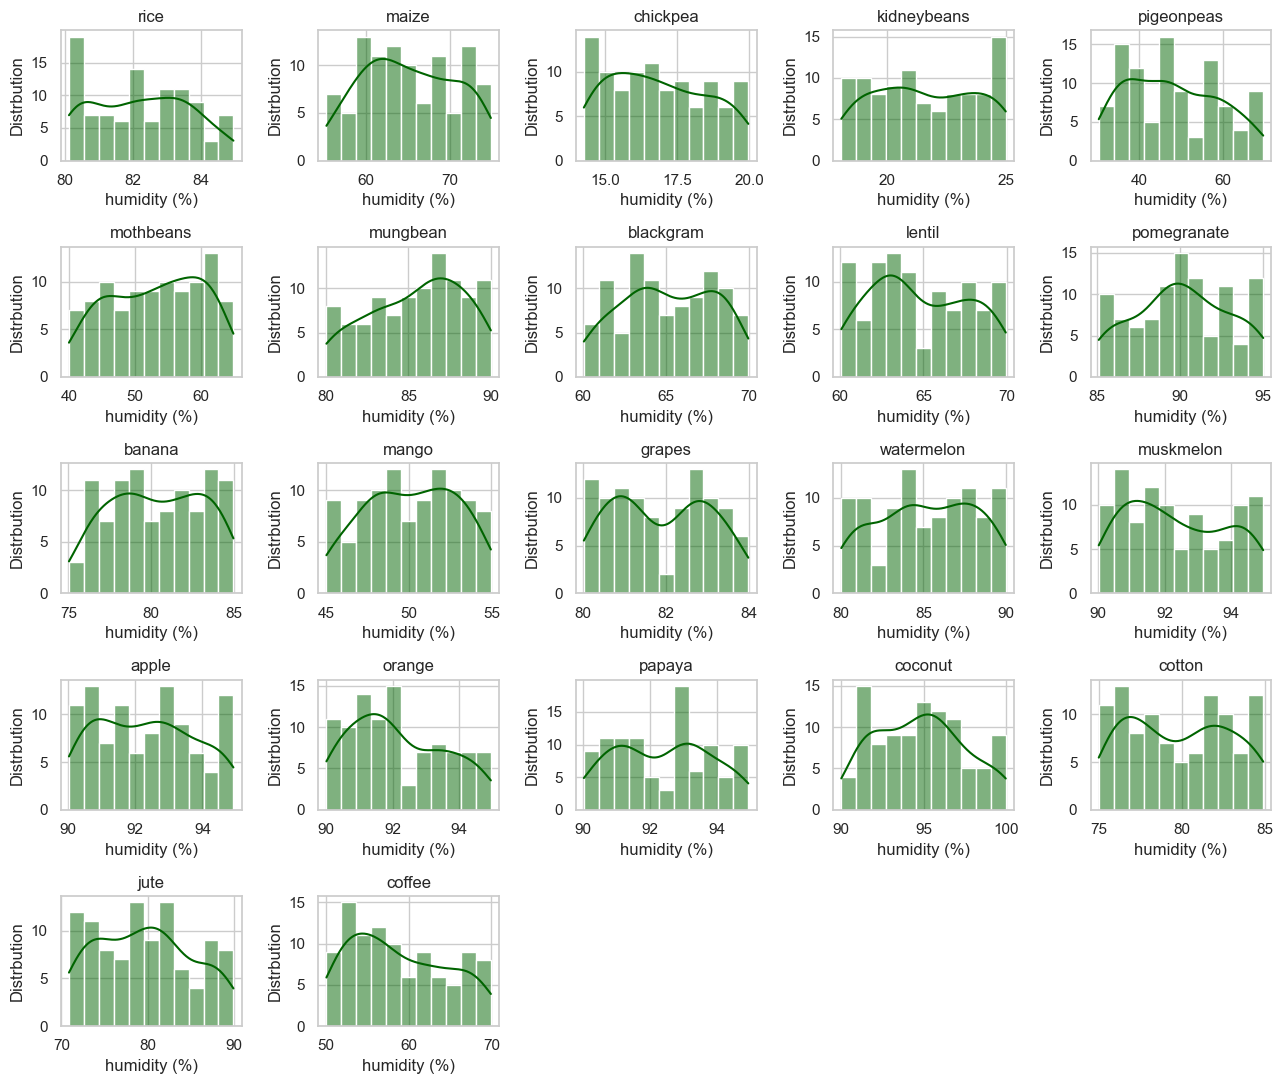

In [140]:
crops = df["Crop"].unique()
plt.figure(figsize=(13, 11))

for i, crop in enumerate(crops, 1):
    plt.subplot(5, 5, i)   
    sns.histplot(df[df["Crop"] == crop]["humidity"], bins=11, kde=True, color="darkgreen")
    plt.title(crop)
    plt.xlabel("humidity (%)")
    plt.ylabel("Distrbution")
    

plt.tight_layout()
plt.show()


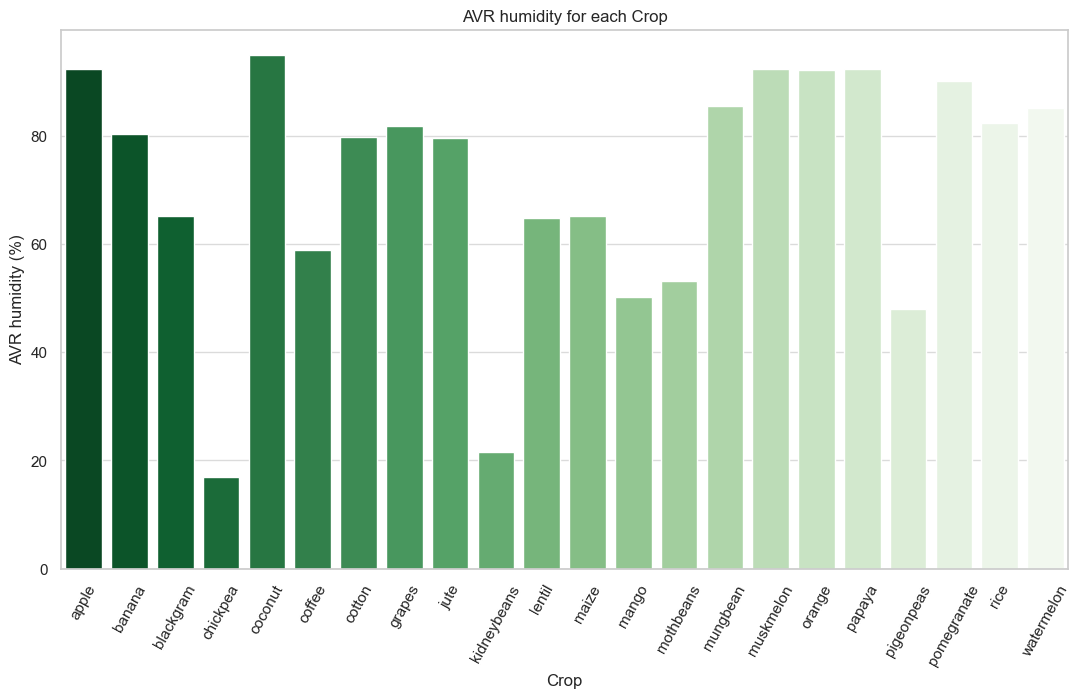

In [141]:
humidity_by_crop = df.groupby("Crop")["humidity"].mean().sort_values()

plt.figure(figsize=(13,7))
sns.barplot(x=humidity_by_crop.index, y=humidity_by_crop.values, hue=humidity_by_crop.index, palette="Greens_r")
plt.xticks(rotation=61)
plt.xlabel("Crop")
plt.ylabel("AVR humidity (%)")
plt.title("AVR humidity for each Crop")
plt.grid(axis="y", linestyle="-", alpha=0.7)
plt.show()


## Relation between Tempreture and Crop

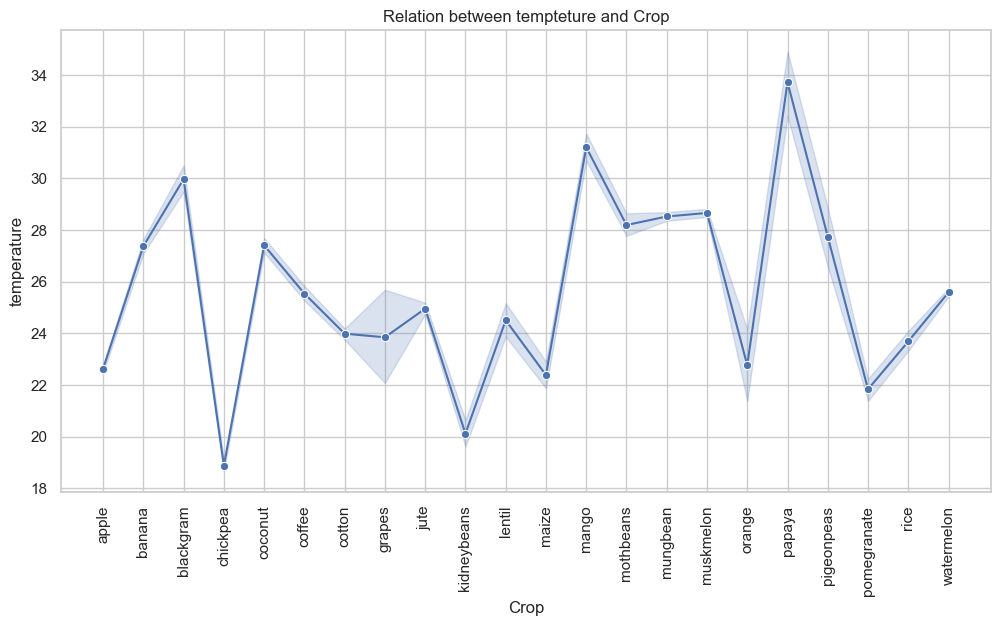

In [142]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Crop", y="temperature", marker="o")
plt.xticks(rotation=90)
plt.title("Relation between tempteture and Crop")
plt.show()


## Relation between rainfall and soil moisture

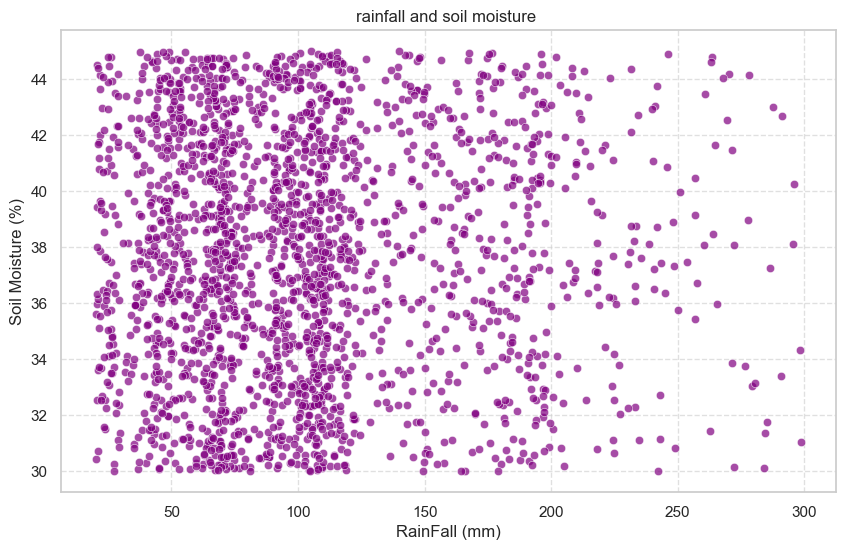

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["rainfall"], y=df["Soil_Moisture"], color="purple", alpha=0.7)
plt.xlabel("RainFall (mm)")
plt.ylabel("Soil Moisture (%)")
plt.title("rainfall and soil moisture ")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# Data Cleaning

In [144]:
df.describe()

,Ratio_of_Nitrogen,Ratio_of_Phosphorous,Ratio_of_ Potassium,temperature,humidity,ph,rainfall,Soil_Moisture
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,37.648580
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,4.291992
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,30.002819
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,34.074320
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,37.678688
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,41.393263
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,44.999825


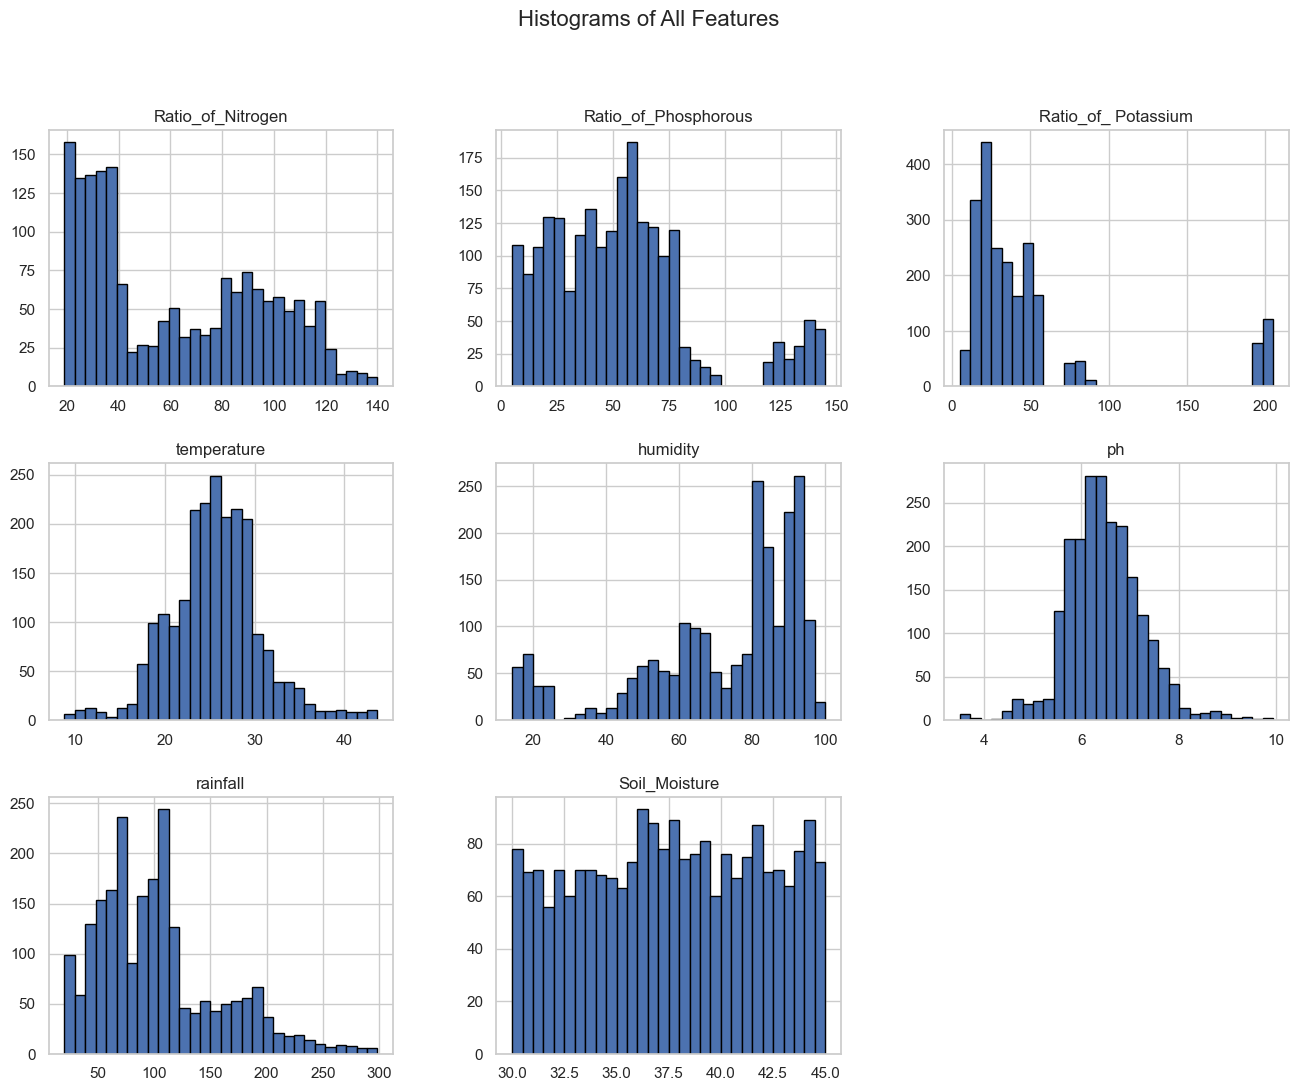

In [148]:
sns.set(style="whitegrid")
df.hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle('Histograms of All Features', fontsize=16)
plt.show()

In [ ]:
scaler = StandardScaler()


In [152]:
encoder = OneHotEncoder()
encoder.fit_transform(df[['Crop']])

<2200x22 sparse matrix of type '<class 'numpy.float64'>'
	with 2200 stored elements in Compressed Sparse Row format>